In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Clinic_Patients_messy.csv')

In [3]:
data

,Patient_ID,Height,Weight,Gender,Systolic_BP&Diastolic_BP,Age
0,1,166.0,89.0,Male,160/110,52
1,2,173.0,75.0,Female,145/74,30
2,3,209.0,92.0,Female,150/95,41
3,4,175.0,79.0,Female,135/90,25 years
4,5,177.0,82.0,Male,145/90,63
...,...,...,...,...,...,...
145,146,217.0,107.0,Female,143/77,85
146,147,180.0,142.0,Female,169/109,76
147,148,184.0,145.0,Female,155/84,77
148,149,178.0,82.0,Male,148/101,70


In [4]:
#Dividing Systolic_BP&Diastolic_BP into two separate columns split by '/'

data[['Systolic_BP','Diastolic_BP']] = data['Systolic_BP&Diastolic_BP'].str.split('/',expand=True)
data.drop('Systolic_BP&Diastolic_BP', axis=1, inplace=True)
print(data)

     Patient_ID  Height  Weight  Gender       Age Systolic_BP Diastolic_BP
0             1   166.0    89.0    Male        52         160          110
1             2   173.0    75.0  Female        30         145           74
2             3   209.0    92.0  Female        41         150           95
3             4   175.0    79.0  Female  25 years         135           90
4             5   177.0    82.0    Male        63         145           90
..          ...     ...     ...     ...       ...         ...          ...
145         146   217.0   107.0  Female        85         143           77
146         147   180.0   142.0  Female        76         169          109
147         148   184.0   145.0  Female        77         155           84
148         149   178.0    82.0    Male        70         148          101
149         150   198.0    96.0    Male        52         113           77

[150 rows x 7 columns]


In [5]:
#Count number of Missing Values
print(data.isna().sum())

Patient_ID      0
Height          4
Weight          4
Gender          0
Age             0
Systolic_BP     0
Diastolic_BP    0
dtype: int64


In [6]:
#Replace missing values in column 'Height' with 0
data['Height'].fillna(0, inplace = True)

In [7]:
#Calculate new sum of missing valued columns
print(data.isna().sum())

Patient_ID      0
Height          0
Weight          4
Gender          0
Age             0
Systolic_BP     0
Diastolic_BP    0
dtype: int64


In [8]:
#Replace missing values in column 'Weight' with 0
data['Weight'].fillna(0, inplace = True)

In [9]:
#Calculate new sum of missing valued columns
print(data.isna().sum())

Patient_ID      0
Height          0
Weight          0
Gender          0
Age             0
Systolic_BP     0
Diastolic_BP    0
dtype: int64


In [10]:
#Changing data type of column 'Gender' to String, 'Systolic_BP' to int and 'Diastolic_BP' to int
data['Gender'] = data['Gender'].astype('string')
data['Systolic_BP'] = data['Systolic_BP'].astype(int)
data['Diastolic_BP'] = data['Diastolic_BP'].astype(int)

In [11]:
print(data.dtypes)

Patient_ID        int64
Height          float64
Weight          float64
Gender           string
Age              object
Systolic_BP       int32
Diastolic_BP      int32
dtype: object


In [12]:
#Replacing cell values in column 'Age' that have years in value

data[['Age','Age2']] = data['Age'].str.split(' ',expand=True)
data.drop('Age2', axis=1, inplace=True)
print(data)

     Patient_ID  Height  Weight  Gender Age  Systolic_BP  Diastolic_BP
0             1   166.0    89.0    Male  52          160           110
1             2   173.0    75.0  Female  30          145            74
2             3   209.0    92.0  Female  41          150            95
3             4   175.0    79.0  Female  25          135            90
4             5   177.0    82.0    Male  63          145            90
..          ...     ...     ...     ...  ..          ...           ...
145         146   217.0   107.0  Female  85          143            77
146         147   180.0   142.0  Female  76          169           109
147         148   184.0   145.0  Female  77          155            84
148         149   178.0    82.0    Male  70          148           101
149         150   198.0    96.0    Male  52          113            77

[150 rows x 7 columns]


In [14]:
#Changing datatype of column 'Age' to integer
data['Age'] = data['Age'].astype(int)

In [15]:
data.dtypes

Patient_ID        int64
Height          float64
Weight          float64
Gender           string
Age               int32
Systolic_BP       int32
Diastolic_BP      int32
dtype: object

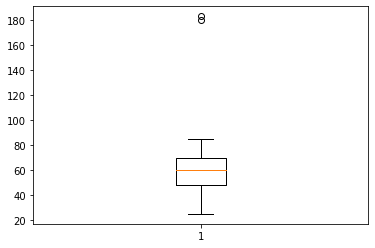

In [16]:
plt.boxplot(data.Age)
plt.show()

plt.boxplot(data.Age)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Patient_ID    150 non-null    int64  
 1   Height        150 non-null    float64
 2   Weight        150 non-null    float64
 3   Gender        150 non-null    string 
 4   Age           150 non-null    int32  
 5   Systolic_BP   150 non-null    int32  
 6   Diastolic_BP  150 non-null    int32  
dtypes: float64(2), int32(3), int64(1), string(1)
memory usage: 6.6 KB


In [25]:
data.dtypes

Patient_ID        int64
Height          float64
Weight          float64
Gender           string
Age               int32
Systolic_BP       int32
Diastolic_BP      int32
dtype: object

In [33]:
#Filter rows with Height and Weight as 0 and filtering outliers
data = (data[(data['Height'] != 0) & (data['Weight'] != 0)])

In [34]:
#Filter rows with 'Age' greater than 150
data = (data[data['Age']<150])

In [35]:
print(data)

     Patient_ID  Height  Weight  Gender  Age  Systolic_BP  Diastolic_BP
0             1   166.0    89.0    Male   52          160           110
1             2   173.0    75.0  Female   30          145            74
2             3   209.0    92.0  Female   41          150            95
3             4   175.0    79.0  Female   25          135            90
4             5   177.0    82.0    Male   63          145            90
..          ...     ...     ...     ...  ...          ...           ...
145         146   217.0   107.0  Female   85          143            77
146         147   180.0   142.0  Female   76          169           109
147         148   184.0   145.0  Female   77          155            84
148         149   178.0    82.0    Male   70          148           101
149         150   198.0    96.0    Male   52          113            77

[144 rows x 7 columns]
